# This is example notebook file to test the surfaces of torus

In [1]:
# %matplotlib notebook
import sys
sys.path.append('/mnt/01TB/Final_Optimization_work/XICSRT_NEW/xicsrt')
import numpy as np
import xicsrt
from xicsrt.util import profiler
from xicsrt.xicsrt_raytrace import raytrace

DEBUG:xicsrt: The xicrsrt_contrib package is installed.


In [2]:
def get_config():
    # 1.
    config = dict()

    # 2.
    config['general'] = {}
    config['general']['number_of_iter'] = 1
    config['general']['save_images'] = False
    config['general']['random_seed'] = 0

    # 3.
    config['sources'] = {}
    config['sources']['source'] = {}
    config['sources']['source']['class_name'] = 'XicsrtSourceDirected'
    config['sources']['source']['intensity'] = 1e4
    config['sources']['source']['wavelength'] = 3.9492
    config['sources']['source']['spread'] = np.radians(5.0)
    config['sources']['source']['xsize'] = 0.00
    config['sources']['source']['ysize'] = 0.00
    config['sources']['source']['zsize'] = 0.00

    # 4.
    config['optics'] = {}
    config['optics']['crystal'] = {}
    config['optics']['crystal']['class_name'] = 'XicsrtOpticPlanarMirror'
    config['optics']['crystal']['check_size'] = True
    config['optics']['crystal']['origin'] = [0.0, 0.0,         0.80374151]
    config['optics']['crystal']['zaxis']  = [0.0, 0.59497864, -0.80374151]
    config['optics']['crystal']['xaxis']  = [1.0, 0.0, 0.0]
    config['optics']['crystal']['xsize']  = 0.2
    config['optics']['crystal']['ysize']  = 0.2


    # 5.
    config['optics']['detector'] = {}
    config['optics']['detector']['class_name'] = 'XicsrtOpticDetector'
    config['optics']['detector']['origin'] = [0.0,  0.76871290, 0.56904832]
    config['optics']['detector']['zaxis']  = [0.0, -0.95641806, 0.29200084]
    config['optics']['detector']['xsize']  = 0.4
    config['optics']['detector']['ysize']  = 0.2
    
    return config

def run(config):
    # 6.
    profiler.resetProfiler()
    profiler.startProfiler()

    results = xicsrt.raytrace(config)

    profiler.stopProfiler()
    profiler.report()
    
    return results

results_dict = {}

In [4]:
config = get_config()
config['optics']['crystal']['class_name'] = 'XicsrtOpticMeshToroidalMosaicGraphiteTest'
# Rocking curve FWHM in radians.
# This is taken from x0h for quartz 1,1,-2,0
# Darwin Curve, sigma: 48.070 urad
# Darwin Curve, pi:    14.043 urad
config['optics']['crystal']['crystal_spacing'] = 2.45676
config['optics']['crystal']['rocking_type'] = 'gaussian'
config['optics']['crystal']['rocking_fwhm'] = 48.070e-4
config['optics']['crystal']['check_bragg']  = False
config['optics']['crystal']['radius_major'] = 5
config['optics']['crystal']['radius_minor'] = 2
config['optics']['crystal']['angle_major'] = [-0.1,0.1]   
config['optics']['crystal']['angle_minor'] = [-0.13,0.13]
"""
Change surfaces values from 0 to 3 to get desired surface
surfaces = 0 means concave/concave surface
surfaces = 1 means concave/convex surface
surfaces = 2 means convex/concave surface
surfaces = 3 means convex/convex surface
"""
config['optics']['crystal']['surfaces'] = 1
config['optics']['crystal']['normal_method'] = 'analytic'
config['optics']['crystal']['mosaic_depth'] = 1
config['optics']['crystal']['mosaic_spread'] = np.radians(0.1)
# config['optics']['crystal']['angle_major'] = [-1*np.pi*1e-0,1*np.pi*1e-0] # creates greater circle of radius Rmajor
# config['optics']['crystal']['angle_minor'] = [-3*np.pi*1e-1,3*np.pi*1e-1]

results = run(config)

 INFO:xicsrt: Starting run: 1 of 1
 INFO:xicsrt: Seeding np.random with 0
DEBUG:xicsrt: Creating filters
DEBUG:xicsrt: Creating sources
DEBUG:xicsrt: Creating optics
DEBUG:xicsrt: Yo mama was here.
DEBUG:xicsrt: num_a, num_b: 21, 11, total: 231


DEBUG:xicsrt: num_a, num_b: 11, 5, total: 55


DEBUG:xicsrt: WxH: 0.200x0.200
DEBUG:xicsrt: Pixel grid size: 100 x 100
DEBUG:xicsrt: Pixel grid size: 100 x 50
 INFO:xicsrt: Starting iteration: 1 of 1
DEBUG:xicsrt: Generating rays
DEBUG:xicsrt: Raytracing optics
DEBUG:xicsrt: Rays on XicsrtOpticMeshToroidalMosaicGraphiteTest: 1.0000e+04
DEBUG:xicsrt:   Mosaic iteration: 0 rays: 10000
DEBUG:xicsrt: Rays from XicsrtOpticMeshToroidalMosaicGraphiteTest: 1.0000e+04
DEBUG:xicsrt: Rays on XicsrtOpticDetector: 5.8140e+03
DEBUG:xicsrt: Rays from XicsrtOpticDetector: 5.8140e+03



Rays Generated: 1.000e+04
Rays Detected:  5.814e+03
Efficiency:     5.814e-01 ± 7.6e-03 (58.14000%)



 INFO:xicsrt: name                      total           single          calls 
 INFO:xicsrt: raytrace                  0:00:00.614173  0:00:00.614173       1
 INFO:xicsrt: raytrace_single           0:00:00.610323  0:00:00.610323       1
 INFO:xicsrt: generate_mesh             0:00:00.321983  0:00:00.160992       2
 INFO:xicsrt: _raytrace_iter            0:00:00.243200  0:00:00.243200       1
 INFO:xicsrt: Dispatcher: raytrace      0:00:00.235083  0:00:00.235083       1
 INFO:xicsrt: calculate_mesh            0:00:00.213513  0:00:00.053378       4
 INFO:xicsrt: Dispatcher: trace_global  0:00:00.207238  0:00:00.103619       2
 INFO:xicsrt: mesh_intersect_1          0:00:00.083784  0:00:00.083784       1
 INFO:xicsrt: mesh_intersect_2          0:00:00.045983  0:00:00.045983       1
 INFO:xicsrt: Dispatcher: collect       0:00:00.027408  0:00:00.013704       2
 INFO:xicsrt: mesh_interpolate          0:00:00.027182  0:00:00.027182       1
 INFO:xicsrt: mosaic: loop              0:00:00.0251

DEBUG:xicsrt: Yo mama was here.
DEBUG:xicsrt: num_a, num_b: 21, 11, total: 231


DEBUG:xicsrt: num_a, num_b: 11, 5, total: 55


DEBUG:xicsrt: WxH: 0.200x0.200
DEBUG:xicsrt: Pixel grid size: 100 x 100
 INFO:xicsrt: Histogram bins, size:0.002000 num: 120
 INFO:xicsrt: Histogram bins, size:0.002000 num: 120
DEBUG:xicsrt: lost  crystal    4212
DEBUG:xicsrt: found crystal    5788


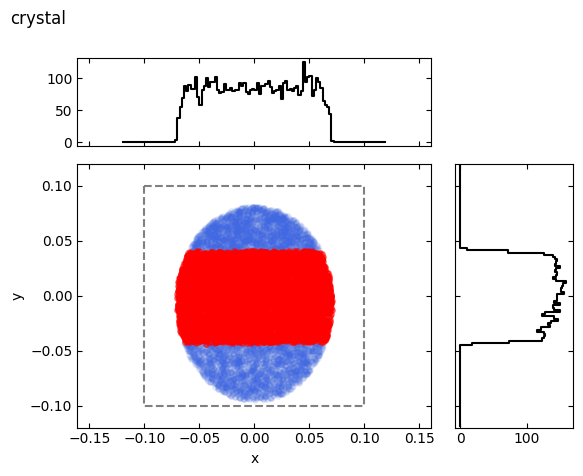

In [4]:
import xicsrt.visual.xicsrt_2d__matplotlib as xicsrt_2d
fig = xicsrt_2d.plot_intersect(results, 'crystal', aspect='equal')

DEBUG:xicsrt: Pixel grid size: 100 x 50
 INFO:xicsrt: Histogram bins, size:0.004000 num: 120
 INFO:xicsrt: Histogram bins, size:0.004000 num:  60
DEBUG:xicsrt: lost  detector   4212
DEBUG:xicsrt: found detector   5788


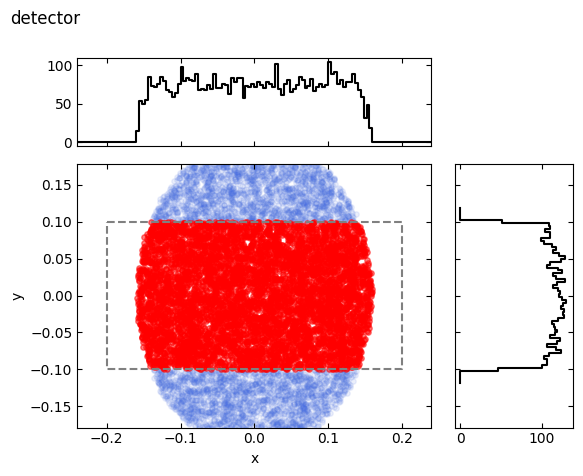

In [5]:
import xicsrt.visual.xicsrt_2d__matplotlib as xicsrt_2d
fig = xicsrt_2d.plot_intersect(results, 'detector', aspect='equal')

In [6]:
import xicsrt.visual.xicsrt_3d__plotly as xicsrt_3d

fig = xicsrt_3d.figure()
xicsrt_3d.add_rays(results)
xicsrt_3d.add_optics(results['config'])
xicsrt_3d.add_sources(results['config'])
xicsrt_3d.show()

DEBUG:xicsrt: Yo mama was here.
DEBUG:xicsrt: num_a, num_b: 21, 11, total: 231


DEBUG:xicsrt: num_a, num_b: 11, 5, total: 55


DEBUG:xicsrt: WxH: 0.200x0.200
DEBUG:xicsrt: Pixel grid size: 100 x 100
DEBUG:xicsrt: Pixel grid size: 100 x 50
